In [1]:
import pandas as pd

In [2]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np
from sklearn.metrics import silhouette_score

In [3]:
names = pd.read_csv('names.csv')

In [53]:
pd.set_option('display.max_rows', 30)
pd.set_option('display.max_columns', 30)

In [5]:
names.dtypes

Unnamed: 0           int64
names               object
sexe                object
given_since2013    float64
given_since2018    float64
                    ...   
turkish_names      float64
biblic_names       float64
viking_names       float64
mythology_names    float64
fiction_names      float64
Length: 31, dtype: object

In [6]:
names = names.drop(['Unnamed: 0'], axis=1)

In [7]:
print(names.shape)
print(names.isna().sum().sum())
names.head()

(2954, 30)
0


,names,sexe,given_since2013,given_since2018,given_2013_yn,given_2018_yn,popularity_10y,popularity_5y,lenght,hyphen,...,french_names,italian_names,celt_names,english_names,germanic_names,turkish_names,biblic_names,viking_names,mythology_names,fiction_names
0,AALIYAH,F,2166.0,1245.0,1,1,101.379310,53.684211,7,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,AARON,M,22669.0,11797.0,1,1,19.926586,1.644444,5,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,ABBY,F,1791.0,1100.0,1,1,107.894737,26.063830,4,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,ABDALLAH,M,2297.0,929.0,1,1,-40.384615,-36.213992,8,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,ABDEL,M,80.0,0.0,1,0,-100.000000,-9999.000000,5,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## X_num & X_cat

In [8]:
first_names = names.names
X = names.drop(['names'], axis=1)

In [9]:
X_num = X.select_dtypes('number')
X_cat = X.select_dtypes('object')

In [10]:
print(X_num.shape)
print(X_cat.shape)

(2954, 26)
(2954, 3)


## OneHotEncoder and MinMaxScaler

In [14]:
## MinMaxScaler

In [12]:
transformer = MinMaxScaler().fit(X_num)

X_num_norm = transformer.transform(X_num)
X_num_norm = pd.DataFrame(X_num_norm, columns=X_num.columns)

print(X_num_norm.shape)
display(X_num_norm.head())


(2954, 26)


,given_since2013,given_since2018,given_2013_yn,given_2018_yn,popularity_10y,popularity_5y,lenght,hyphen,neutral,given_total,...,french_names,italian_names,celt_names,english_names,germanic_names,turkish_names,biblic_names,viking_names,mythology_names,fiction_names
0,0.041476,0.050409,1.0,1.0,0.505069,0.502684,0.357143,0.0,0.0,0.001180,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.434081,0.477650,1.0,1.0,0.500996,0.500082,0.214286,0.0,0.0,0.014972,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.034295,0.044538,1.0,1.0,0.505395,0.501303,0.142857,0.0,0.0,0.001065,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.043984,0.037614,1.0,1.0,0.497981,0.498189,0.428571,0.0,0.0,0.001718,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.001532,0.000000,1.0,0.0,0.494999,0.000000,0.214286,0.0,0.0,0.000605,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [17]:
## OneHotEncoder

In [13]:
encoder = OneHotEncoder(drop='first').fit(X_cat) 
cols = encoder.get_feature_names_out(input_features=X_cat.columns)

X_cat_encoded = pd.DataFrame(encoder.transform(X_cat).toarray(),columns=cols) #to.array() to change the format to Array
print(X_cat_encoded.shape)
display(X_cat_encoded.head())

(2954, 18)


,sexe_M,category_Popular,category_Rare,category_Uncommon,category_Very Popular,category_Very Rare,decade_popularity_1910s,decade_popularity_1920s,decade_popularity_1930s,decade_popularity_1940s,decade_popularity_1950s,decade_popularity_1960s,decade_popularity_1970s,decade_popularity_1980s,decade_popularity_1990s,decade_popularity_2000s,decade_popularity_2010s,decade_popularity_2020s
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [14]:
X_transf = pd.concat([X_num_norm, X_cat_encoded], axis=1)
print(X_transf.shape)
display(X_transf.head())

(2954, 44)


,given_since2013,given_since2018,given_2013_yn,given_2018_yn,popularity_10y,popularity_5y,lenght,hyphen,neutral,given_total,...,decade_popularity_1930s,decade_popularity_1940s,decade_popularity_1950s,decade_popularity_1960s,decade_popularity_1970s,decade_popularity_1980s,decade_popularity_1990s,decade_popularity_2000s,decade_popularity_2010s,decade_popularity_2020s
0,0.041476,0.050409,1.0,1.0,0.505069,0.502684,0.357143,0.0,0.0,0.001180,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.434081,0.477650,1.0,1.0,0.500996,0.500082,0.214286,0.0,0.0,0.014972,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.034295,0.044538,1.0,1.0,0.505395,0.501303,0.142857,0.0,0.0,0.001065,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.043984,0.037614,1.0,1.0,0.497981,0.498189,0.428571,0.0,0.0,0.001718,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.001532,0.000000,1.0,0.0,0.494999,0.000000,0.214286,0.0,0.0,0.000605,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


## K means Model

Text(0.5, 1.0, 'Elbow Method showing the optimal k')

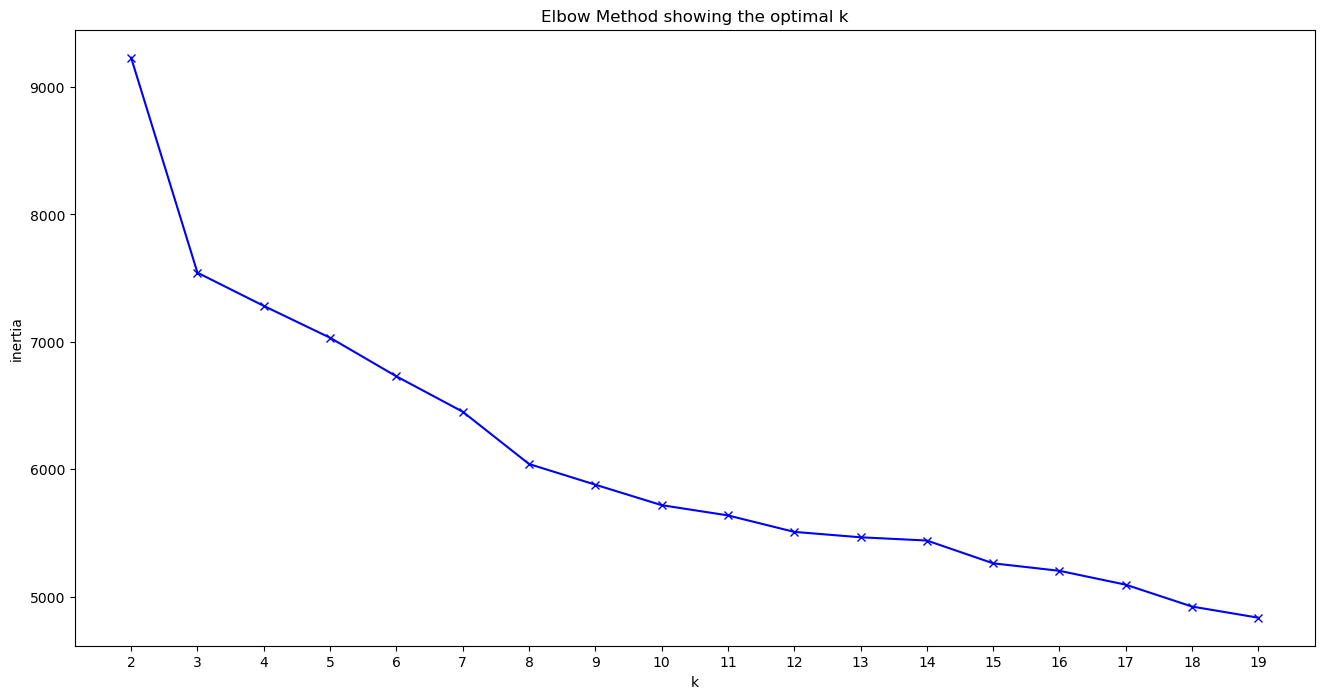

In [15]:
K = range(2, 20)
inertia = []

for k in K:
    kmeans = KMeans(n_clusters=k,
                    n_init='auto',
                    random_state=789)
    kmeans.fit(X_transf)
    inertia.append(kmeans.inertia_)

import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(16,8))
plt.plot(K, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('inertia')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Elbow Method showing the optimal k')

In [21]:
# let's see the sihlouette score

Text(0.5, 1.0, 'Silhouette score showing the optimal k')

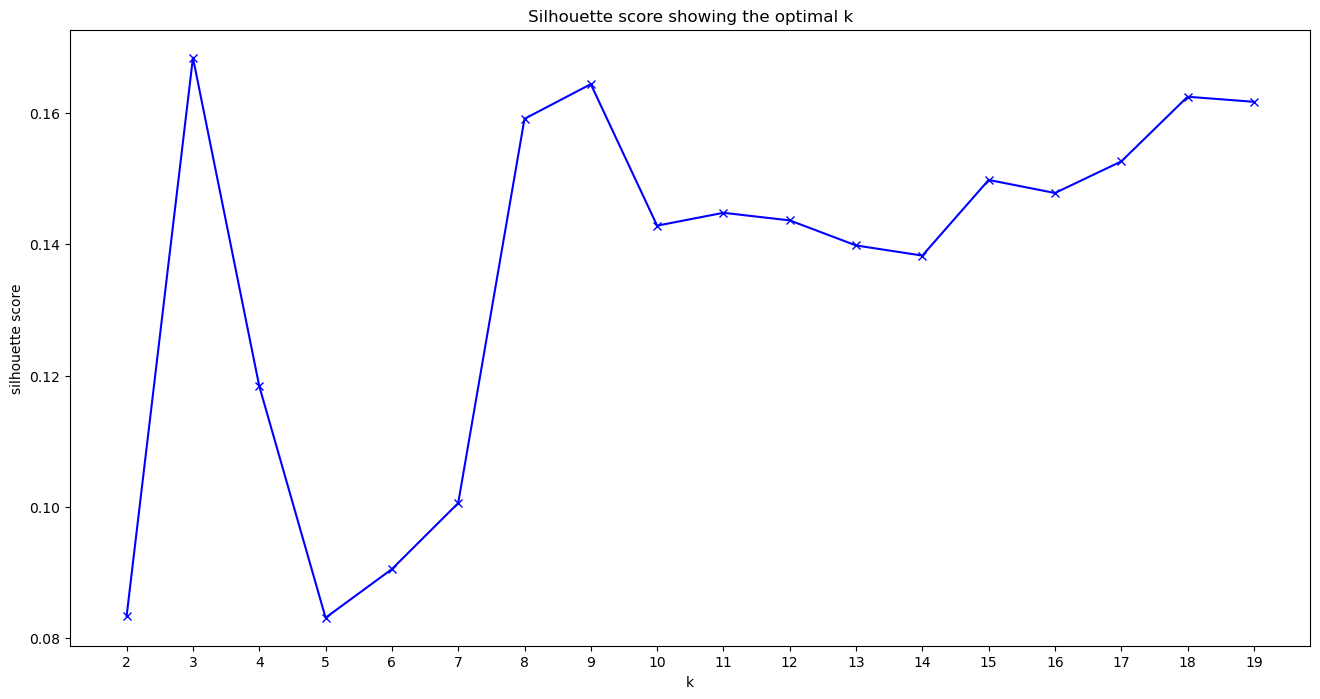

In [16]:
from sklearn.metrics import silhouette_score
K = range(2, 20)
silhouette = []

for k in K:
    kmeans = KMeans(n_clusters=k,
                    n_init='auto',
                    random_state=789)
    kmeans.fit(X_transf)
    silhouette.append(silhouette_score(X_transf, kmeans.predict(X_transf)))


plt.figure(figsize=(16,8))
plt.plot(K, silhouette, 'bx-')
plt.xlabel('k')
plt.ylabel('silhouette score')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Silhouette score showing the optimal k')

In [23]:
# pick at 9 and 15

In [17]:
kmeans = KMeans(n_clusters=9, random_state=789)
kmeans.fit(X_transf)
print(kmeans.inertia_)

C:\Users\tella\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


5836.918768936139


In [18]:
kmeans = KMeans(n_clusters=15, random_state=789)
kmeans.fit(X_transf)
print(kmeans.inertia_)

C:\Users\tella\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


5056.061886259063


## Concat Dataset names with the clusters

In [19]:
clusters = kmeans.predict(X_transf)
pd.Series(clusters).value_counts().sort_index()

0     169
1     258
2     186
3     228
4     187
5     185
6     179
7     138
8     133
9     203
10    156
11    282
12    223
13    211
14    216
Name: count, dtype: int64

In [20]:
df_clusters = pd.DataFrame(clusters, columns=['clusters'])

In [21]:
names_clusters = pd.concat([names, df_clusters], axis=1)

In [23]:
names_clusters[names_clusters['clusters']== 11]

,names,sexe,given_since2013,given_since2018,given_2013_yn,given_2018_yn,popularity_10y,popularity_5y,lenght,hyphen,...,italian_names,celt_names,english_names,germanic_names,turkish_names,biblic_names,viking_names,mythology_names,fiction_names,clusters
3,ABDALLAH,M,2297.0,929.0,1,1,-40.384615,-36.213992,8,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11
7,ABDELLAH,M,162.0,0.0,1,0,-100.000000,-9999.000000,8,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11
10,ABDULLAH,M,162.0,81.0,1,1,-100.000000,-100.000000,8,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,11
22,ADALINE,F,80.0,80.0,1,1,-100.000000,-100.000000,7,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11
23,ADAM,M,39666.0,17334.0,1,1,-26.900319,-17.641026,4,0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2920,ZÉLIA,F,80.0,0.0,1,0,-100.000000,-9999.000000,5,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11
2933,ÉLISE,F,3730.0,2244.0,1,1,85.317460,1.742919,5,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11
2941,ÉLÉNA,F,2756.0,1714.0,1,1,65.174129,1.529052,5,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11
2942,ÉLÉONORE,F,2796.0,1735.0,1,1,96.875000,32.167832,8,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11


In [ ]:
# I want to check below if the number of F and M per cluster is equivalent

In [49]:
cluster_check = names_clusters.pivot_table(index = ['clusters', 'sexe'], values = 'names', aggfunc = 'count')

In [54]:
cluster_check.T

clusters  0        1         2        3       4         5        6       7   \
sexe       F   M    F    M    F   M    F   M   F    M    F   M    F   M   F   
names     79  90  155  103  101  85  153  75  83  104  115  70  120  59  78   

clusters      8       9        10       11        12      13        14      
sexe       M   F   M   F    M   F   M    F    M    F   M   F    M    F   M  
names     60  71  62  95  108  98  58  158  124  128  95  96  115  135  81

In [ ]:
# Conclusion = no imbalanced cluster

## Recommandations

    1- ask for input: "give me a name you like"

    2- search the input in our names_cluster DF
    2a- separate names_cluster 
        df == M if input_name.sexe == M
        df == F if input_name.sexe == F

    3- give another name from the cluster + same gender


        4- ask for input: Do you like the name? yes or no? (if error: please enter yes or no)


            5a- if yes, give another name from the same cluster + same gender

            5b- if not, give a name from another cluster + same gender


                6- ask for input: Do you like the name? yes or no? (if error: please enter yes or no)


                    7a- if yes, give another name from the same cluster  + same gender

                    7b- if not, give a name from another cluster + same gender


STOP


In [147]:
def recommended_name(names_clusters, input_gender):
    
# 1- Ask for input gender and name
    input_gender = input_gender.lower()
    while input_gender not in ['girl', 'boy']:
        print('Your answer is incorrect, please try again')
        input_gender = input('Are you looking for a recommandation for a girl or a boy? Please enter girl or boy: ')
    
    input_name = input('Enter a name you like: ')
    input_name = input_name.upper()
    
    while input_name not in names_clusters['names'].values:
        print('sorry we do not know this name')
        input_name = input('please try another name: ')
        input_name = input_name.upper()
    
# 2- search the input in our names_cluster DF where sexe = F
    cluster_sexe_F = names_clusters[names_clusters['sexe'] == 'F']
    
    if input_gender == 'girl':
        cluster_label = cluster_sexe_F[cluster_sexe_F['names'] == input_name]['clusters'].iloc[0]
        random_names = cluster_sexe_F[cluster_sexe_F['clusters'] == cluster_label]
    
# 3- give another name from the cluster
        recommended_name1 = random_names[random_names['names'] != input_name].sample(n=1).iloc[0][0]
       
        print(f"Our recommendation is {recommended_name1}.")
        
# 4- ask for input: Do you like the name? yes or no? (if error: please enter yes or no)  
        input_question = input('Do you like this name? please answer yes or no: ')
    
        while input_question.lower() not in ['yes', 'no']:
            print('Your answer is incorrect, please try again')
            input_question = input('Do you like this name? please answer yes or no: ')

        
# 5a- if YES, give another name from the same cluster
        if input_question.lower() == 'yes':
            recommended_name2 = random_names[(random_names['names'] != input_name) & (random_names['names'] != recommended_name1)].sample(n=1).iloc[0][0]
            print(f"Our next recommendation is {recommended_name2}.")

            
# 6- ask for input: Do you like the name? yes or no? (if error: please enter yes or no)
            input_question = input('Do you like this name? please answer yes or no: ')
    
            while input_question.lower() not in ['yes', 'no']:
                print('Your answer is incorrect, please answer yes or no')
                input_question = input('Do you like this name? please answer yes or no: ')

        # 7a- if YES, give another name from the same cluster
            if input_question.lower() == 'yes':
                recommended_name3 = random_names[(random_names['names'] != input_name) & (random_names['names'] != recommended_name1) & (random_names['names'] != recommended_name2)].sample(n=1).iloc[0][0]
                print(f"Our last recommendation is {recommended_name3}. Thank you for using our recommender")
        
            else:
        # 7b- if NO, give a name from another cluster
                different_cluster1 = cluster_sexe_F[(cluster_sexe_F['clusters'] != cluster_label)]
                recommended_name4 = different_cluster1.sample(n=1)['names'].iloc[0]
                print(f"Our last recommendation is {recommended_name4}. Thank you for using our recommender")
        
        else:
# 5b- if NO, give a name from another cluster
            different_cluster2 = cluster_sexe_F[cluster_sexe_F['clusters'] != cluster_label]
            recommended_name5 = different_cluster2.sample(n=1)['names'].iloc[0]
            cluster_recommandation5 = different_cluster2[different_cluster2['names'] == recommended_name5]['clusters'].iloc[0]
            print(f"Our next recommendation is {recommended_name5}.")

# 6- ask for input: Do you like the name? yes or no? (if error: please enter yes or no)
            input_question = input('Do you like this name? please answer yes or no: ')
    
            while input_question.lower() not in ['yes', 'no']:
                print('Your answer is incorrect, please answer yes or no')
                input_question = input('Do you like this name? please answer yes or no: ')

# 7a- if YES, give another name from the same cluster
            if input_question.lower() == 'yes':
                same_cluster = different_cluster2[different_cluster2['clusters'] == cluster_recommandation5] 
                recommended_name6 = same_cluster[(same_cluster['names'] != recommended_name5)].sample(n=1).iloc[0][0]
                print(f"Our last recommendation is {recommended_name6}. Thank you for using our recommender")
        
            else:
# 7b- if NO, give a name from another cluster
                different_cluster3 = cluster_sexe_F[(cluster_sexe_F['clusters'] != cluster_label) & (cluster_sexe_F['clusters'] != cluster_recommandation5)]
                recommended_name7 = different_cluster3.sample(n=1)['names'].iloc[0]
                print(f"Our last recommendation is {recommended_name7}. Thank you for using our recommender")
        

# 2- search the input in our names_cluster DF where sexe = M
    cluster_sexe_M = names_clusters[names_clusters['sexe'] == 'M']
    
    if input_gender == 'boy':
        cluster_label = cluster_sexe_M[cluster_sexe_M['names'] == input_name]['clusters'].iloc[0]
        random_names = cluster_sexe_M[cluster_sexe_M['clusters'] == cluster_label]
    
# 3- give another name from the cluster
        recommended_name11 = random_names[random_names['names'] != input_name].sample(n=1).iloc[0][0]
       
        print(f"Our recommendation is {recommended_name11}.")
        
# 4- ask for input: Do you like the name? yes or no? (if error: please enter yes or no)  
        input_question = input('Do you like this name? please answer yes or no: ')
    
        while input_question.lower() not in ['yes', 'no']:
            print('Your answer is incorrect, please try again')
            input_question = input('Do you like this name? please answer yes or no: ')

        
# 5a- if YES, give another name from the same cluster
        if input_question.lower() == 'yes':
            recommended_name12 = random_names[(random_names['names'] != input_name) & (random_names['names'] != recommended_name11)].sample(n=1).iloc[0][0]
            print(f"Our next recommendation is {recommended_name12}.")

            
# 6- ask for input: Do you like the name? yes or no? (if error: please enter yes or no)
            input_question = input('Do you like this name? please answer yes or no: ')
    
            while input_question.lower() not in ['yes', 'no']:
                print('Your answer is incorrect, please answer yes or no')
                input_question = input('Do you like this name? please answer yes or no: ')

        # 7a- if YES, give another name from the same cluster
            if input_question.lower() == 'yes':
                recommended_name13 = random_names[(random_names['names'] != input_name) & (random_names['names'] != recommended_name11) & (random_names['names'] != recommended_name12)].sample(n=1).iloc[0][0]
                print(f"Our last recommendation is {recommended_name13}. Thank you for using our recommender")
        
            else:
        # 7b- if NO, give a name from another cluster
                different_cluster11 = cluster_sexe_M[(cluster_sexe_M['clusters'] != cluster_label)]
                recommended_name14 = different_cluster11.sample(n=1)['names'].iloc[0]
                print(f"Our last recommendation is {recommended_name14}. Thank you for using our recommender")
        
        else:
# 5b- if NO, give a name from another cluster
            different_cluster12 = cluster_sexe_M[cluster_sexe_M['clusters'] != cluster_label]
            recommended_name15 = different_cluster12.sample(n=1)['names'].iloc[0]
            cluster_recommandation15 = different_cluster12[different_cluster12['names'] == recommended_name15]['clusters'].iloc[0]
            print(f"Our next recommendation is {recommended_name15}.")

# 6- ask for input: Do you like the name? yes or no? (if error: please enter yes or no)
            input_question = input('Do you like this name? please answer yes or no: ')
    
            while input_question.lower() not in ['yes', 'no']:
                print('Your answer is incorrect, please answer yes or no')
                input_question = input('Do you like this name? please answer yes or no: ')

# 7a- if YES, give another name from the same cluster
            if input_question.lower() == 'yes':
                same_cluster = different_cluster12[different_cluster12['clusters'] == cluster_recommandation15] 
                recommended_name16 = same_cluster[(same_cluster['names'] != recommended_name15)].sample(n=1).iloc[0][0]
                print(f"Our last recommendation is {recommended_name16}. Thank you for using our recommender")
        
            else:
# 7b- if NO, give a name from another cluster
                different_cluster13 = cluster_sexe_M[(cluster_sexe_M['clusters'] != cluster_label) & (cluster_sexe_M['clusters'] != cluster_recommandation15)]
                recommended_name17 = different_cluster13.sample(n=1)['names'].iloc[0]
                print(f"Our last recommendation is {recommended_name17}. Thank you for using our recommender")
        


In [146]:
user_input = input("Are you looking for a recommandation for a girl or a boy? Please enter girl or boy:")
recommended_name(names_clusters, user_input)

Are you looking for a recommandation for a girl or a boy? Please enter girl or boy:BOY
Enter a name you like: bla
sorry we do not know this name
please try another name: raul
sorry we do not know this name
please try another name: raoul
Our recommendation is JEAN-FRANÇOIS.
Do you like this name? please answer yes or no: no
Our next recommendation is LYSANDRE.
Do you like this name? please answer yes or no: yes
Our last recommendation is SELYAN. Thank you for using our recommender


In [149]:
names_clusters[names_clusters['names']== 'SELYAN']
#names_clusters[names_clusters['names']== 'SIHEM']

,names,sexe,given_since2013,given_since2018,given_2013_yn,given_2018_yn,popularity_10y,popularity_5y,lenght,hyphen,neutral,given_total,count,category,decade_popularity,...,arabic_names,greek_names,american_names,latin_names,french_names,italian_names,celt_names,english_names,germanic_names,turkish_names,biblic_names,viking_names,mythology_names,fiction_names,clusters
2528,SELYAN,M,377.0,203.0,1,1,-100.0,-100.0,6,0,0,785.0,8,Rare,2010s,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2


In [ ]:
label = names_clusters[names_clusters['names'] == 'LEA']['clusters'].iloc[0]

In [ ]:
rand = names_clusters[names_clusters['clusters'] == label]

In [ ]:
rand

In [ ]:
rand_name = rand[rand['names'] != 'LEA'].sample(n=1).iloc[0][0]

In [ ]:
rand_name

In [ ]:
rand_no = names_clusters[names_clusters['clusters'] != label]

In [ ]:
rand_no

In [ ]:
rand_name2 = rand[(rand['names'] != 'LEA') & (rand['names'] != 'MAHE')].sample(n=1).iloc[0][0]

In [ ]:
rand_name2

In [81]:
sexeF = names_clusters[names_clusters['sexe'] == 'F']

In [82]:
label = sexeF[sexeF['names'] == 'LEA']['clusters'].iloc[0]

In [83]:
label

11

In [84]:
diff = sexeF[sexeF['clusters'] != label]
diff

,names,sexe,given_since2013,given_since2018,given_2013_yn,given_2018_yn,popularity_10y,popularity_5y,lenght,hyphen,neutral,given_total,count,category,decade_popularity,...,arabic_names,greek_names,american_names,latin_names,french_names,italian_names,celt_names,english_names,germanic_names,turkish_names,biblic_names,viking_names,mythology_names,fiction_names,clusters
0,AALIYAH,F,2166.0,1245.0,1,1,101.379310,53.684211,7,0,0,2714.0,14,Uncommon,2010s,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12
2,ABBY,F,1791.0,1100.0,1,1,107.894737,26.063830,4,0,0,2456.0,16,Uncommon,2010s,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,8
12,ABIGAEL,F,0.0,0.0,0,0,-9999.000000,-9999.000000,7,0,0,681.0,6,Rare,2000s,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14
13,ABIGAELLE,F,0.0,0.0,0,0,-9999.000000,-9999.000000,9,0,0,539.0,5,Rare,2000s,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,14
14,ABIGAIL,F,0.0,0.0,0,0,-9999.000000,-9999.000000,7,0,0,286.0,3,Very Rare,2000s,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2943,ÉMIE,F,228.0,228.0,1,1,9999.000000,9999.000000,4,0,0,228.0,2,Very Rare,2020s,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
2946,ÉMY,F,921.0,731.0,1,1,9999.000000,39.166667,3,0,0,921.0,7,Rare,2020s,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
2947,ÉNOLA,F,86.0,86.0,1,1,-100.000000,-100.000000,5,0,0,86.0,1,Very Rare,2020s,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
2948,ÉNORA,F,917.0,345.0,1,1,-100.000000,-100.000000,5,0,0,1028.0,9,Rare,2010s,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2


In [88]:
reco_name3 = diff.sample(n=1)['names'].iloc[0]
reco_name3

'NATALIA'